## Solution
Note that this is not the only way, or the best way to complete this lab. It is intended to demonstrate different Python tools and syntax, so if there is anything that you cannot comprehend be sure to ask for explanation.

## Correlation, Regression, and Residuals Lab

In this lab, you will describe and model the relationship between independent and dependent variables, use your model to make predictions, and evaluate the appropriateness of your model. This notebook is constructed using Markdown cells for narrative and code cells to provide reproducible supporting evidence. When you have completed the notebook it will serve as a deliverable report.

To begin, a dataset is created for you that contains hypothetical data about an unemployment rate and a stock index price.

In [1]:
# Import all of your required libraries here as needed
import pandas as pd

from scipy import stats
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Unemployment_Rate','Stock_Index_Price']) 

df

,Year,Month,Unemployment_Rate,Stock_Index_Price
0,2017,12,5.3,1464
1,2017,11,5.3,1394
2,2017,10,5.3,1357
3,2017,9,5.3,1293
4,2017,8,5.4,1256
5,2017,7,5.6,1254
6,2017,6,5.5,1234
7,2017,5,5.5,1195
8,2017,4,5.5,1159
9,2017,3,5.6,1167


First, model the relationship between unemployment rate and stock index price using OLS regression.

In [3]:
# Calculate the OLS regression equation and print it in a readable format.

# Because linregress returns a tuple, we can extract the values using tuple unpacking
# https://www.tutorialspoint.com/unpacking-a-tuple-in-python

# We use the underscore _ when we need a variable but don't actually care about keeping it
# Because lingress returns 5 values but we only need the first 3, I use _ to drop the last 2 values

(slope, intercept, rvalue, _, _) = stats.linregress(x=df['Unemployment_Rate'], y=df['Stock_Index_Price'])
print("Given that y is Stock Index Price, and x is Unemployment Rate:")
print(f"The equation of the LSRL is y = {slope:.2f} * x + {intercept:.2f}")

Given that y is Stock Index Price, and x is Unemployment Rate:
The equation of the LSRL is y = -588.96 * x + 4471.34


Then show the correlation coefficient and coefficient of determination.

In [4]:
# Calculate (if necessary) and print in a readable format R and R-squared.
print(f"This regression line has a correlation coefficient (r) of {rvalue:.3f},")

# In Python double-asterisk is the exponent operator
# Here I'm squaring rvalue inside the f-string. 
# You can also do it separately, e.g.: rsquared = rvalue ** 2
print(f"and a coefficient of determination (r-squared) of {rvalue ** 2:.3f}.")

This regression line has a correlation coefficient (r) of -0.922,
and a coefficient of determination (r-squared) of 0.851.


Next, explain in plain language how to interpret the relationship between unemployment rate and stock index price, as well as the correlation coefficient. 

__Answer:__

We predict the Stock Index Price to be \\$4471.34 minus \\$588.96 for each additional percentage point in the unemployment rate.

The correlation coefficient -0.922 tells us that there is a strong, negative linear relationship between stock index price and unemployment rate.

(Optional) The coefficient of determination tells us that 85.1% of the variation in stock index price is caused by changes to the unemployment rate (the other 14.9% of variation in stock index price is unexplained at this time).

==========

Use your model to make predictions about the stock index price if the unemployment rate is 5%, 6%, or 10%.

In [5]:
# Predict stock index price here. Output should be in human-readable format.
rates = [5, 6, 10]

for rate in rates:
    prediction = slope * rate + intercept
    print(f"When the unemployment rate is {rate}%, the predicted stock index price is ${prediction:.2f}.")

When the unemployment rate is 5%, the predicted stock index price is $1526.53.
When the unemployment rate is 6%, the predicted stock index price is $937.57.
When the unemployment rate is 10%, the predicted stock index price is $-1418.28.


Do you have confidence in these predictions? Explain why or why not.

__Answer:__

I am confident in the prediction for 6% because the original unemployment rates used to create the regression line range from 5.3 and 6.2, and there was strong correlation, so we should feel confident for predictions within that range. I am less confident for my prediction at 5%, because it is outside the range of our original data, but not extremely so. I have little confidence in the prediction for 10%, not only is it extrapolation, it is also not possible to have a negative stock price.

===========

Now construct a visualization of the correlation and regression.

<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Stock_Index_Price'>

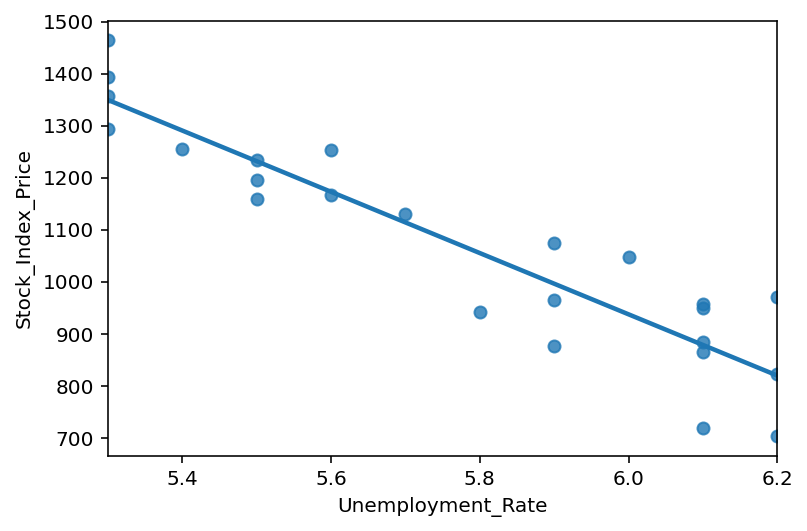

In [6]:
# Display a scatterplot with regression line.
sns.regplot(x='Unemployment_Rate', y='Stock_Index_Price', data=df, ci=False)

Also construct a residual plot.

<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Stock_Index_Price'>

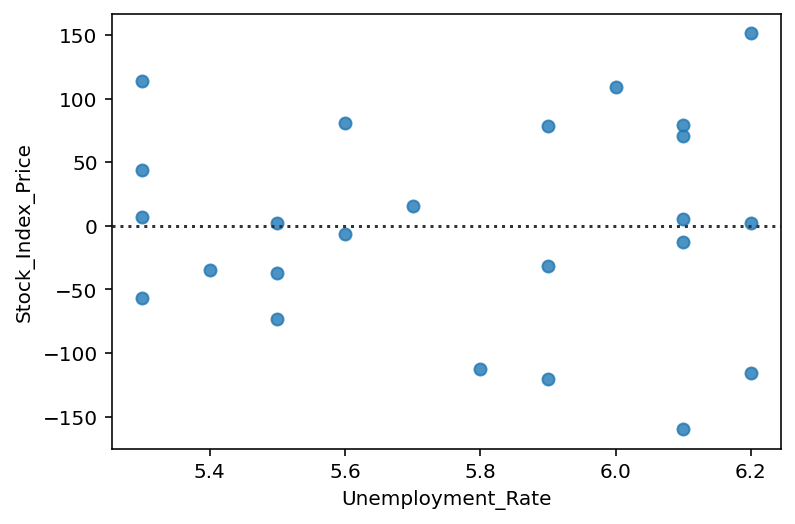

In [7]:
# Display a residual plot.
sns.residplot(x='Unemployment_Rate', y='Stock_Index_Price', data=df)

Evaluate your model using the correlation coefficient and the residual plot.

__Answer:__

Because the correlation coefficient was close to -1 (indicating a strong linear relationship), and there is no clear pattern on the residual plot, I feel that this linear model is appropriate, and we can feel confident in the predictions made with it.